In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('iris.data', header=None)

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm', 'class']

In [5]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
class_label_mapping = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

In [8]:
df['class'] = df['class'].map(class_label_mapping)

In [9]:
y = df['class'].values

In [10]:
df.drop(axis=1, inplace=True, labels='class')

In [11]:
X = df.values

In [12]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [13]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [14]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42, shuffle=True, stratify=y)

# Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()

In [19]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [20]:
X_train_std[0:5]

array([[ 1.19452367,  0.30570892,  0.62281135,  0.49431153],
       [-0.10859306, -0.15285446,  0.24038333,  0.08238526],
       [-1.62889591, -0.15285446, -1.45322649, -1.42801109],
       [-0.10859306, -0.61141784,  0.24038333,  0.21969401],
       [-0.76015142,  2.13996244, -1.28932877, -1.15339358]])

In [21]:
X_test_std[0:5]

array([[-1.30311673,  0.30570892, -1.23469619, -1.29070234],
       [-0.76015142,  2.13996244, -1.28932877, -1.29070234],
       [-0.76015142,  3.51565258, -1.18006362, -1.29070234],
       [-1.30311673,  0.7642723 , -1.28932877, -1.29070234],
       [-0.10859306, -1.06998122,  0.40428105,  0.21969401]])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
clf = LogisticRegression(multi_class='auto', solver='lbfgs')

In [24]:
clf.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = clf.predict(X_test_std)

In [26]:
from libs import metrics

In [27]:
import importlib
importlib.reload(metrics)

<module 'libs.metrics' from 'C:\\Users\\Lucas\\Documents\\python-machine-learning\\Machine Learning with Iris Dataset\\libs\\metrics.py'>

# Accuracy

In [28]:
metrics.accuracy(y_test, y_pred)

0.9481481481481482

# Precision

In [29]:
metrics.precision(y_test, y_pred)

0.948903932946486

# Recall

In [30]:
metrics.recall(y_test, y_pred)

0.9481481481481482

# F1 Measure

In [31]:
metrics.f1_measure(y_test, y_pred)

0.9485258899951349

# Log Loss

In [32]:
from sklearn.metrics import log_loss

In [33]:
y_pred[0:25]

array([0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       1, 2, 1], dtype=int64)

In [34]:
y_test[0:25]

array([0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 1], dtype=int64)

In [35]:
y_score = clf.predict_proba(X_test_std)
eval_ = log_loss(y_test, y_score)

In [36]:
print (eval_)

0.30437519572019617


# Roc Curve and Area Under Cuver

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np

In [38]:
y_score.shape

(135, 3)

In [39]:
y_test.shape

(135,)

In [40]:
y_score_virginica = y_score[:, 2]

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_score_virginica, pos_label=2)
print('AUC', auc(fpr, tpr))

AUC 0.994074074074074


In [42]:
from matplotlib import pyplot as pl

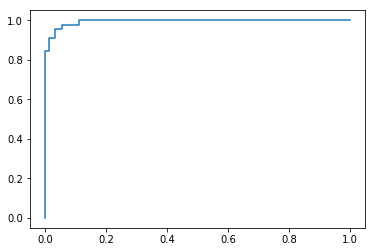

In [43]:
pl.plot(fpr, tpr)